# Day 9: Feature Engineering
Welcome to Day 9 of my 100 Days of AI/ML Challenge!

Today's focus is on **Feature Engineering** — the process of transforming raw data into meaningful inputs that improve model performance.

In this notebook, we'll:
- Explore feature scaling, encoding, and polynomial transformations
- Use pipelines for structured preprocessing
- Analyze feature importance
- Apply dimensionality reduction with PCA
- Compare models trained on raw vs engineered features



In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sklearn

# For explainability
import shap

# Example dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 🔹 Feature Scaling
Scaling ensures that features measured in different units contribute equally.

- **StandardScaler** → rescales features to mean=0, std=1
- **MinMaxScaler** → rescales features between [0,1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Before scaling:')
print(X_train.describe().iloc[:,:3])

print('\nAfter scaling:')
print(pd.DataFrame(X_train_scaled, columns=X.columns).describe().iloc[:,:3])

Before scaling:
       mean radius  mean texture  mean perimeter
count   455.000000    455.000000      455.000000
mean     14.117635     19.185033       91.882242
std       3.535815      4.266005       24.322027
min       7.691000      9.710000       47.920000
25%      11.705000     16.170000       75.100000
50%      13.300000     18.680000       85.980000
75%      15.740000     21.585000      103.750000
max      28.110000     39.280000      188.500000

After scaling:
        mean radius  mean texture  mean perimeter
count  4.550000e+02  4.550000e+02    4.550000e+02
mean  -1.811494e-15 -3.373126e-15   -3.634699e-15
std    1.001101e+00  1.001101e+00    1.001101e+00
min   -1.819583e+00 -2.223500e+00   -1.809497e+00
25%   -6.830930e-01 -7.075360e-01   -6.907613e-01
50%   -2.314983e-01 -1.185158e-01   -2.429378e-01
75%    4.593426e-01  5.631988e-01    4.884799e-01
max    3.961679e+00  4.715674e+00    3.976811e+00


## 🔹 Feature Encoding
For categorical features:
- **One-Hot Encoding** for nominal categories (unordered)
- **Ordinal Encoding** for ordered categories

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import sklearn

# Example dataset with categorical values
df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'blue', 'red'],
    'size': ['S', 'M', 'L', 'M', 'S'],
    'target': [0, 1, 0, 1, 0]
})
display(df)

# One-hot encoding (handle sklearn version differences)
if sklearn.__version__ >= "1.2":
    ohe = OneHotEncoder(sparse_output=False)
else:
    ohe = OneHotEncoder(sparse=False)

encoded = ohe.fit_transform(df[['color']])
pd.DataFrame(encoded, columns=ohe.get_feature_names_out())


,color,size,target
0,red,S,0
1,blue,M,1
2,green,L,0
3,blue,M,1
4,red,S,0


,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


## 🔹 Polynomial Features
Polynomial transformations allow models to capture non-linear relationships.

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X[['mean radius', 'mean texture']])
print('Original shape:', X[['mean radius','mean texture']].shape)
print('Transformed shape:', X_poly.shape)

Original shape: (569, 2)
Transformed shape: (569, 5)


## 🔹 Pipelines & ColumnTransformers
Pipelines help structure preprocessing and modeling together.

In [15]:
numeric_features = X.columns[:10]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(max_iter=500))])

scores = cross_val_score(clf, X, y, cv=5)
print('Cross-val accuracy with preprocessing pipeline:', scores.mean())

Cross-val accuracy with preprocessing pipeline: 0.9332091290172333


## 🔹 Feature Importance with Tree-Based Models
Tree-based models like Random Forests provide feature importance directly.

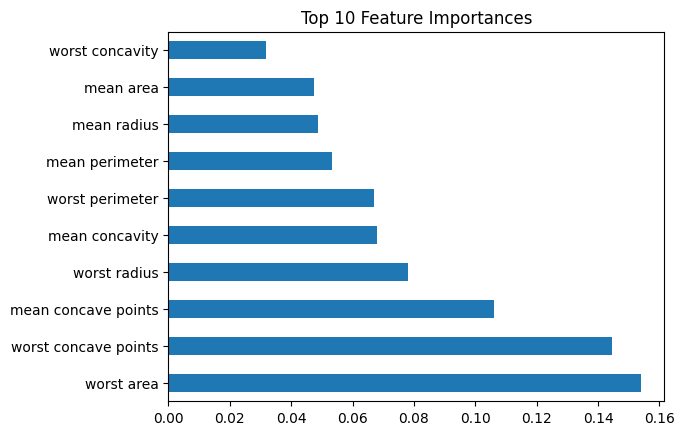

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

## 🔹 Model Explainability with SHAP
SHAP values explain how each feature contributes to predictions.

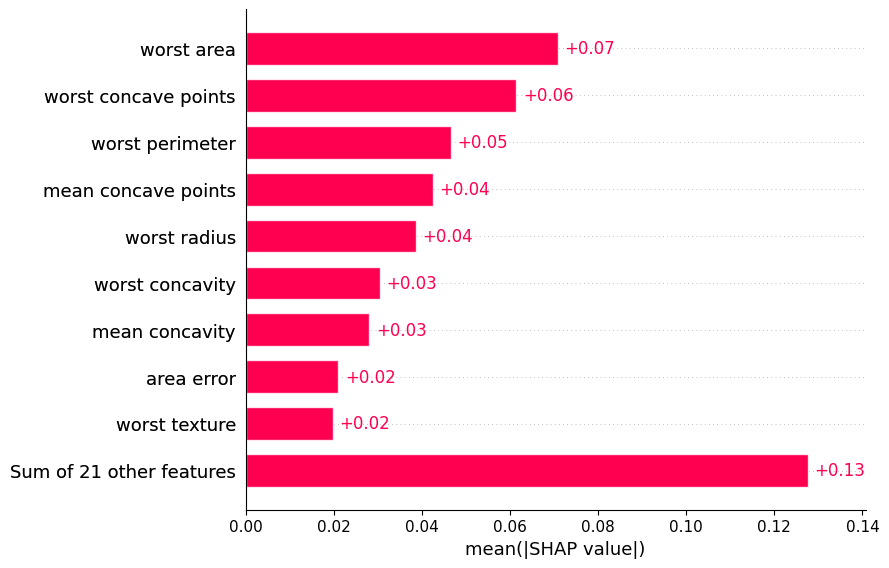

In [27]:
import shap
import pandas as pd

# Ensure X_train and X_test are DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

# Create SHAP explainer
explainer = shap.Explainer(rf, X_train_df)

# Compute SHAP values
shap_values = explainer(X_test_df)

# For binary classification, use the SHAP values for the positive class (1)
shap_values_class1 = shap.Explanation(
    values=shap_values.values[:,:,1],
    base_values=shap_values.base_values[:,1],
    data=shap_values.data,
    feature_names=X.columns
)

# Bar plot for class 1
shap.plots.bar(shap_values_class1, max_display=10)


## 🔹 Dimensionality Reduction with PCA
PCA helps reduce dimensionality while retaining variance.

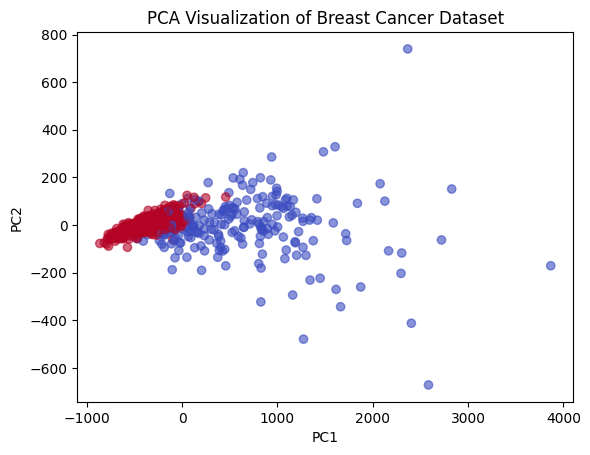

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization of Breast Cancer Dataset')
plt.show()

 ✨ Key Takeaway
Good features often matter more than fancy models. Feature engineering is like giving your model a better language to describe the world. The clearer the language, the better it can learn.

